In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics

In [3]:
#Loading the dataset
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#Normalizing the data with z-score technique
for col in boston.columns[:-1]:
    min_ = min(boston[col]) 
    max_ = max(boston[col])
    mean = np.mean(boston[col])
    std = np.std(boston[col])
    boston[col] = (boston[col] - mean) / std
print('Completed')

Completed


In [5]:
x_full = boston[boston.columns[:-1]]
y = boston['MEDV']
x_full.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,-0.414974,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,-0.408169,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,-0.401618,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
8,-0.393853,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774
9,-0.398650,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344


In [6]:
#Question 2

#We make use of train_test_split to split our data into training and testing set

X_train,X_test,Y_train,Y_test = train_test_split(x_full,y,test_size = 0.2, shuffle=True,random_state = 100)

from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge


#Apply Kfold cross validation on the training set and get the train_R_score and test_R_score 
kf  = KFold(n_splits = 10, shuffle=True, random_state = 40)


#Instantiate the Ridge classifier with alpha value 
le = Ridge(alpha = 1)

#Fit the model
#Predict on x_test generated from k-fold
#Predict on X_test the unseen data
#Get the R score for each iteration and lastly divide by 10 to get the mean

test_Rscore = 0
train_Rscore = 0

for times, (train_idx,test_idx) in enumerate(kf.split(X_train,Y_train)):
    x_train,x_test = x_full.iloc[train_idx], x_full.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    le.fit(x_train,y_train)
    y_pred = le.predict(x_test)
    train_Rscore += le.score(x_test,y_test)
    test_Rscore += le.score(X_test,Y_test)

print('Traning Rscore ', train_Rscore/10)
print('Testing Rscore ',test_Rscore/10)

Traning Rscore  0.6844368076626595
Testing Rscore  0.7381448002704709


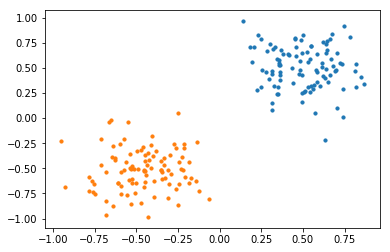

In [3]:
#Question 4 part(a)
#Generating data with centered as (0.5,0.5) and (-0.5,-0.5)

def makeData():
    mu = 0.5
    sigma = 0.2

    mu1 = -0.5
    sigma1 = 0.2

    x_cor = np.random.normal(mu, sigma, 100)
    y_cor = np.random.normal(mu, sigma, 100)

    x1_cor = np.random.normal(mu1, sigma1, 100)
    y1_cor = np.random.normal(mu1, sigma1, 100)

    plt.scatter(x_cor,y_cor,s=10)
    plt.scatter(x1_cor,y1_cor,s=10)
    
    return x_cor,y_cor,x1_cor,y1_cor
x_cor,y_cor,x1_cor,y1_cor = makeData()


In [4]:
#Question 4 part b and part c

import numpy as np

class LogisticRegression:
    
    def sigmoid(self,X):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-X))

    def cost_function(self,params, X, y):
        # Computes the cost function for all the training samples
        fx = self.sigmoid(X.dot(params))
        cost = -np.sum(y * np.log(fx) + (1 - y)* np.log(1-fx))
        return cost
    
    def gradient_descent(self,params,X,y,iterations,alpha):
        cost_history = np.zeros((iterations,1))
        for i in range(iterations):
            params = params + alpha * (X.T.dot(y - self.sigmoid(X.dot(params))))
            cost_history[i] = self.cost_function(params,X, y)
        return (cost_history, params)
    
        
        


In [5]:

#Storing it in a dataframe which will be used as passing parameters to function call
def buildData():
    
    X_ = pd.DataFrame()
    X_['1'] = np.array(list(x_cor) + list(x1_cor))
    X_['2'] = np.array(list(y_cor) + list(y1_cor))

    X_final = np.c_[np.ones((X_.shape[0], 1)), X_]
    y_final = np.array([1]*100 + [0]*100)
    y_final = y_final[:,np.newaxis]
    
    return X_final,y_final
X_final,y_final = buildData()
print('Completed')

Completed


In [8]:
import time

#Defining the parameters such as alpha, iterations

#Creating the instance of the class

lr = LogisticRegression()
iterations = 2000
learning_rate = 0.003

params1 = np.random.randn(X_final.shape[1])
params1 = params1[:,np.newaxis]

start = time.time()

intial_cost = lr.cost_function(params1,X_final,y_final)
(cost_history, params_optimal)  = lr.gradient_descent(params1,X_final,y_final,iterations,learning_rate)

end = time.time()

print('Gradient Descent\n')
print(f'Time eclapsed for GD is {end-start} secs')
print('Initial cost ',intial_cost)
print('Final cost',cost_history[-1])
print('Optimal Parameters :',params_optimal)
print('\n\n')

#Now sampling 50 samples from X_final and y_final and pass on to gradient descent function

from random import sample

choice = [i for i in range(200)]
index = sample(choice,50)
df_X = pd.DataFrame(X_final)
df_y = pd.DataFrame(y_final)

X_st,y_st = df_X.iloc[index],df_y.iloc[index]
X_st = np.array(X_st)
y_st = np.array(y_st)


#params_st = np.zeros((X_st.shape[1], 1))
params_st = np.random.randn(X_st.shape[1])
params_st = params_st[:,np.newaxis]
start = time.time()
intial_cost_st = lr.cost_function(params_st,X_st,y_st)
(cost_history_st, params_optimal_st)  = lr.gradient_descent(params_st,X_st,y_st,iterations,learning_rate)
end = time.time()


print('Stochastic Gradient Descent\n')
print(f'Time eclapsed for SGD {end-start} secs')
print('Initial cost ',intial_cost_st)
print('Final cost',cost_history_st[-1])
print('Optimal Parameters :',params_optimal_st)


#Observed

#As we can see GD takes longer time to run and SGD beats it in running time
#However, if we look at the plot, it is quite evident that SGD takes more iteration to converge as no of samples are less when compared to GD

Gradient Descent

Time eclapsed for GD is 0.22921299934387207 secs
Initial cost  186.05459191914355
Final cost [0.90063669]
Optimal Parameters : [[-0.23334625]
 [ 7.45153472]
 [ 6.88961984]]



Stochastic Gradient Descent

Time eclapsed for SGD 0.07280659675598145 secs
Initial cost  54.857713081355065
Final cost [0.70727994]
Optimal Parameters : [[-0.01001744]
 [ 5.29806885]
 [ 5.40562741]]


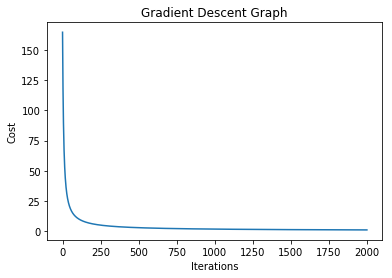

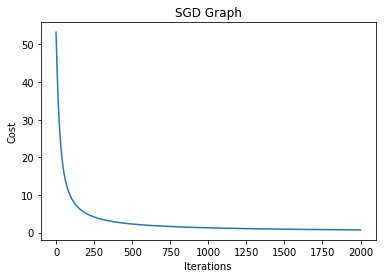

In [9]:


#Question 4 part d
#Plotting cost history vs iteration

plt.plot(range(iterations),cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Graph')
plt.show()


plt.plot(range(iterations),cost_history_st)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('SGD Graph')
plt.show()

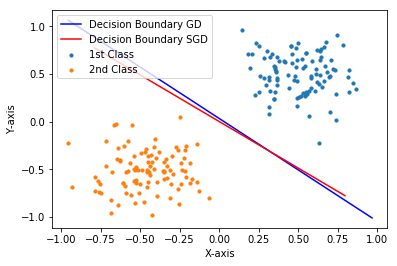

In [11]:
#Drawing Decision Boundary
#Question 4 part d

#For SGD
theta1 = np.array(params_optimal_st)
x_values1 = np.array([np.min(X_st[:,1]),np.max(X_st[:,2])])
y_values1 = - (theta1[0] + theta1[1]*x_values1.T) / theta1[2]


#For GD
theta = np.array(params_optimal)
x_values = np.array([np.min(X_final[:,1]),np.max(X_final[:,2])])
y_values = - (theta[0] + theta[1]*x_values.T) / theta[2]


#Plotting the Decision Boundary
plt.scatter(x_cor,y_cor,s=10,label='1st Class')
plt.scatter(x1_cor,y1_cor,s=10,label = '2nd Class')
plt.plot(x_values, y_values, label='Decision Boundary GD',c='b')
plt.plot(x_values1, y_values1, label='Decision Boundary SGD',c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()